In [ ]:
import pandas as pd   # Para manipulación de datos
import numpy as np    # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos más avanzados

In [ ]:
from google.colab import files
uploaded = files.upload()  # Seleccionas el archivo desde tu PC

# Cargar el archivo con codificación compatible
df = pd.read_csv("combate_resultados4.csv")

Saving combate_resultados4.csv to combate_resultados4.csv


In [ ]:
print(df.head(40))

       participante         nick                           fotourl  \
0   Javier Salvador    Xmz Charz  https://i.imgur.com/44l6CKP.jpeg   
1     Lucila Najera         Lucy  https://i.imgur.com/djaS15B.jpeg   
2     Andres Najera       Andres  https://i.imgur.com/DjzIysQ.jpeg   
3     Lucila Najera         Lucy  https://i.imgur.com/djaS15B.jpeg   
4   Javier Salvador    Xmz Charz  https://i.imgur.com/44l6CKP.jpeg   
5   Javier Salvador    Xmz Charz  https://i.imgur.com/44l6CKP.jpeg   
6     Lucila Najera         Lucy  https://i.imgur.com/djaS15B.jpeg   
7     Lucila Najera         Lucy  https://i.imgur.com/djaS15B.jpeg   
8   Javier Salvador    Xmz Charz  https://i.imgur.com/44l6CKP.jpeg   
9     Lucila Najera         Lucy  https://i.imgur.com/djaS15B.jpeg   
10    Lucila Najera         Lucy  https://i.imgur.com/djaS15B.jpeg   
11    Lucila Najera         Lucy  https://i.imgur.com/djaS15B.jpeg   
12    Andres Najera       Andres  https://i.imgur.com/DjzIysQ.jpeg   
13  Javier Salvador 

In [ ]:
# Información general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   participante         4429 non-null   object 
 1   nick                 4429 non-null   object 
 2   fotourl              4429 non-null   object 
 3   celular              946 non-null    float64
 4   correo               310 non-null    object 
 5   resultado            4429 non-null   object 
 6   marcador             4429 non-null   int64  
 7   idcombate            4429 non-null   int64  
 8   game                 4429 non-null   object 
 9   anio_del_juego       4429 non-null   int64  
 10  franquicia           4429 non-null   object 
 11  consola              4429 non-null   object 
 12  torneo_juego         4429 non-null   object 
 13  torneo_juego_fecha   4429 non-null   object 
 14  torneo_juego_hora    4429 non-null   object 
 15  torneo               4429 non-null   o

In [ ]:
# Dimensiones de la base de datos
print("Filas y columnas:", df.shape)

Filas y columnas: (4429, 25)


In [ ]:
# Variables dependientes Calculadas

# Contar cuántas veces cada jugador ganó o perdió
resumen = df.groupby(['participante', 'resultado']).size().unstack(fill_value=0)

# TOTAL PARTIDAS
# Agregar el total de partidas
resumen['total_partidas'] = resumen.sum(axis=1)

# TOTAL PARTIDAS GANADAS Y PERDIDAS
# Reordenar las columnas por claridad
resumen = resumen.reindex(columns=['GANO', 'PERDIO', 'total_partidas'], fill_value=0)

# Reordenar las columnas por claridad
resumen = resumen.reindex(columns=['GANO', 'PERDIO', 'total_partidas'], fill_value=0)

# RENDIMIENTO PROMEDIO
# Calcular rendimiento promedio (porcentaje de victorias)
resumen['rendimiento_promedio'] = (resumen['GANO'] / resumen['total_partidas']) * 100

# Redondear a 2 decimales para mayor claridad
resumen['rendimiento_promedio'] = resumen['rendimiento_promedio'].round(2)

# PUNTAJE POR GANANCIA
# Calcular puntaje por ganancia
resumen['puntaje_por_ganancia'] = resumen['GANO'] * 0.7
resumen['puntaje_por_ganancia'] = resumen['puntaje_por_ganancia'].round(3)

# TORNEOS GANADOS X PARTICIPANTE
# --- Contar torneos ganados ---
torneos_ganados = (
    df[(df['resultado'] == 'GANO') & (df['instancia_torneo'].isin(['FJ', 'FG']))]
    .groupby('participante')
    .size()
    .rename('torneos_ganados')
)

# EVENTOS GANADOS X PARTICIPANTE
# --- Contar eventos ganados ---
eventos_ganados = (
    df[(df['resultado'] == 'GANO') & (df['instancia_torneo'].isin(['FT', 'FG']))]
    .groupby('participante')
    .size()
    .rename('eventos_ganados')
)

# --- Unir ambos conteos al resumen ---
resumen = resumen.join([torneos_ganados, eventos_ganados])

# --- Rellenar valores faltantes con 0 ---
resumen[['torneos_ganados', 'eventos_ganados']] = resumen[['torneos_ganados', 'eventos_ganados']].fillna(0).astype(int)

# PUNTAJE RANKING
# --- Calcular el puntaje para ranking ---
resumen['puntaje_ranking'] = (
    (resumen['rendimiento_promedio'] * 0.65) +
    (resumen['puntaje_por_ganancia'] * 0.35) +
    (resumen['torneos_ganados'] * 1) +
    (resumen['eventos_ganados'] * 5)
).round(2)

# --- Mostrar resultado final ---
resumen

,GANO,PERDIO,total_partidas,rendimiento_promedio,puntaje_por_ganancia,torneos_ganados,eventos_ganados,puntaje_ranking
participante,,,,,,,,
Alan Sanchez,0,4,4,0.00,0.0,0,0,0.00
Alberto Cadena,61,101,162,37.65,42.7,4,1,48.42
Alejandro Granda,1,2,3,33.33,0.7,0,0,21.91
Alejandro Matute,1,2,3,33.33,0.7,0,0,21.91
Alejandro Pozo,1,2,3,33.33,0.7,0,0,21.91
...,...,...,...,...,...,...,...,...
Victor Salaz,1,2,3,33.33,0.7,0,0,21.91
William Almachi,1,2,3,33.33,0.7,0,0,21.91
Xavier Calderon,0,4,4,0.00,0.0,0,0,0.00


In [ ]:
# Total de partidas por franquicia usando combates únicos
total_partidas_franquicia = (
    df[['franquicia', 'idcombate']]
    .drop_duplicates()        # elimina combates repetidos
    .groupby('franquicia')
    .size()
    .reset_index(name='total_partidas')
)


# Número de participantes únicos por franquicia
participantes_franquicia = (
    df.groupby('franquicia')['participante']
    .nunique()
    .reset_index(name='total_participantes')
)


# Unir total de partidas + total de participantes
resumen_franquicia = total_partidas_franquicia.merge(
    participantes_franquicia, on='franquicia'
)

resumen_franquicia


,franquicia,total_partidas,total_participantes
0,BEAT SABER,10,11
1,BLAZBLUE,22,12
2,BLOODY ROAR,60,19
3,CALL OF DUTY,58,36
4,CATHERINE,42,22
5,CRASH BANDICOOT,22,23
6,DEAD OR ALIVE,49,29
7,DRAGON BALL,255,123
8,DUCK HUNT,13,12
9,FIFA,62,64


In [ ]:
# Renombrar columnas para que aparezcan con nombres claros en la matriz de correlación
resumen_ren = resumen.rename(columns={
    'GANO': 'Partidas ganadas',
    'PERDIO': 'Partidas perdidas',
    'total_partidas': 'Total partidas jugadas',
    'rendimiento_promedio': 'Rendimiento promedio',
    'puntaje_por_ganancia': 'Puntaje ganado',
    'torneos_ganados': 'Torneos ganados',
    'eventos_ganados': 'Eventos ganados',
    'puntaje_ranking': 'Ranking'
})


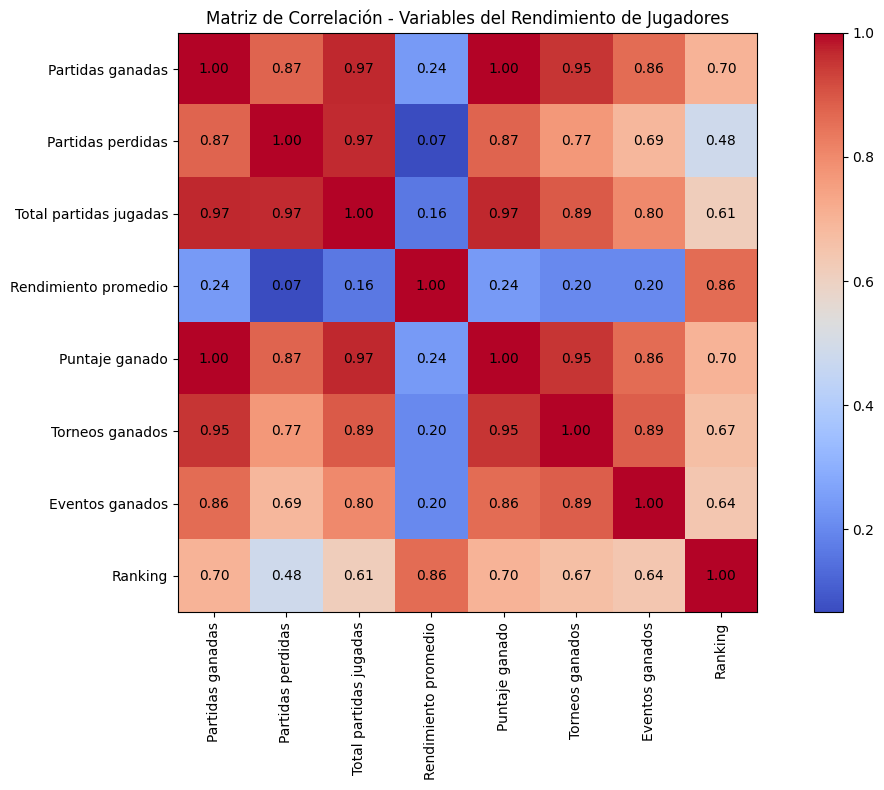

In [ ]:
# Seleccionar solo columnas numéricas ya renombradas
variables_numericas = resumen_ren.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
corr = variables_numericas.corr()

# Heatmap con valores
plt.figure(figsize=(12, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Etiquetas
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)

# Escribir valores numéricos en cada celda
for i in range(len(corr)):
    for j in range(len(corr)):
        valor = corr.iloc[i, j]
        plt.text(j, i, f"{valor:.2f}", ha='center', va='center', color='black')

plt.title("Matriz de Correlación - Variables del Rendimiento de Jugadores")
plt.tight_layout()
plt.show()


Variables extremadamente correlacionadas (multicolinealidad):

Partidas ganadas, Puntaje ganado, Total partidas jugadas, Torneos ganados.
Como el puntaje, total jugado y torneos ganados están altamente influenciados por el número de victorias, todos se mueven juntos.

Partidas ganadas vs Partidas perdidas tiene una correlación de 0.87, esto quiere decir que, en torneos, quienes ganan más suelen perder menos, lo cual es natural.

Variables con correlación moderada

Rendimiento promedio tiene correlación con:
Ranking: 0.86
Partidas ganadas: 0.24
Total jugadas: 0.16
Es una de las mejores variables para predicción, porque no es redundante con las demás.

Ranking tiene correlaciones fuertes con:
Rendimiento promedio: 0.86
Partidas ganadas: 0.70
Puntaje ganado: 0.70
Indica que el ranking refleja desempeño general, no solo victorias o torneos, esto significa que es una variable ideal como objetivo en modelos de predicción de resultados.


In [ ]:
# Estructura de la base de datos
df.info()

# Estadísticas generales (numéricas)
df.describe()

# Revisar columnas con valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   participante         4429 non-null   object 
 1   nick                 4429 non-null   object 
 2   fotourl              4429 non-null   object 
 3   celular              946 non-null    float64
 4   correo               310 non-null    object 
 5   resultado            4429 non-null   object 
 6   marcador             4429 non-null   int64  
 7   idcombate            4429 non-null   int64  
 8   game                 4429 non-null   object 
 9   anio_del_juego       4429 non-null   int64  
 10  franquicia           4429 non-null   object 
 11  consola              4429 non-null   object 
 12  torneo_juego         4429 non-null   object 
 13  torneo_juego_fecha   4429 non-null   object 
 14  torneo_juego_hora    4429 non-null   object 
 15  torneo               4429 non-null   o

,0
participante,0
nick,0
fotourl,0
celular,3483
correo,4119
resultado,0
marcador,0
idcombate,0
game,0
anio_del_juego,0


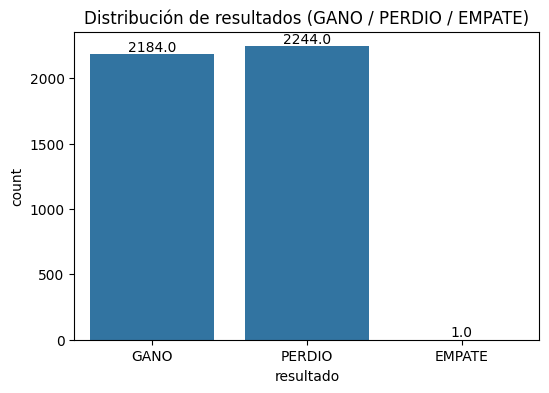

In [ ]:
# Distribución de la variable resultado
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='resultado')
plt.title("Distribución de resultados (GANO / PERDIO / EMPATE)")

# Añadir números sobre las barras
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

plt.show()

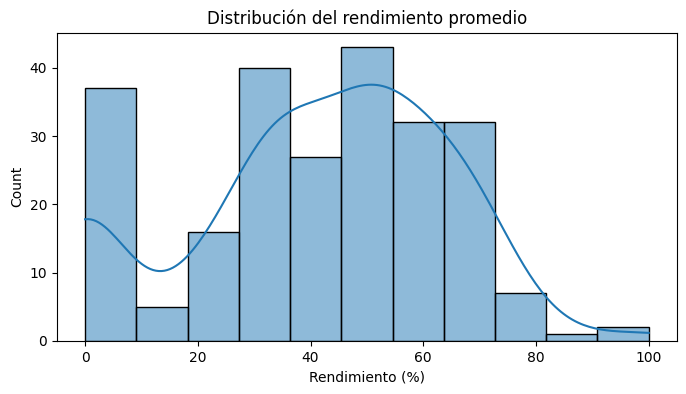

In [ ]:
# Distribucion del rendimiento promedio
plt.figure(figsize=(8,4))
sns.histplot(resumen['rendimiento_promedio'], kde=True)
plt.title("Distribución del rendimiento promedio")
plt.xlabel("Rendimiento (%)")
plt.show()


/tmp/ipython-input-3838251353.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index, rotation=90)


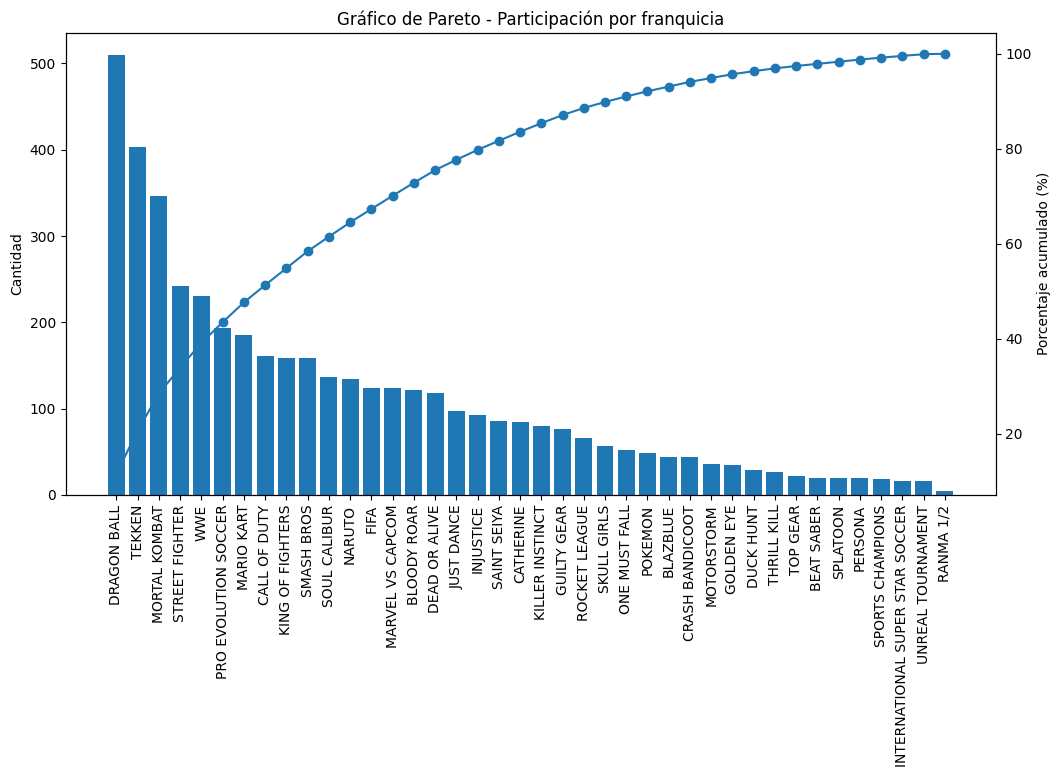

In [ ]:
# Distribucion de franquicias más jugadas
import numpy as np

counts = df['franquicia'].value_counts()
cumperc = counts.cumsum() / counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(12,6))

# Barras
ax1.bar(counts.index, counts.values)
ax1.set_ylabel("Cantidad")
ax1.set_xticklabels(counts.index, rotation=90)

# Línea acumulada
ax2 = ax1.twinx()
ax2.plot(counts.index, cumperc, marker="o")
ax2.set_ylabel("Porcentaje acumulado (%)")

plt.title("Gráfico de Pareto - Participación por franquicia")
plt.show()


In [ ]:
resumen.sort_values("total_partidas", ascending=False).head(10)

,GANO,PERDIO,total_partidas,rendimiento_promedio,puntaje_por_ganancia,torneos_ganados,eventos_ganados,puntaje_ranking
participante,,,,,,,,
Javier Salvador,152,158,310,49.03,106.4,19,2,98.11
Guillermo Pazos,184,106,290,63.45,128.8,28,3,129.32
Diego Estevez,139,108,247,56.28,97.3,18,4,108.64
Andres Najera,103,89,192,53.65,72.1,16,3,91.11
Alberto Cadena,61,101,162,37.65,42.7,4,1,48.42
Lucila Najera,59,87,146,40.41,41.3,6,2,56.72
Dennis Montufar,46,83,129,35.66,32.2,7,1,46.45
Jaime Montalvo,72,55,127,56.69,50.4,16,2,80.49
Christian Mena,42,81,123,34.15,29.4,4,0,36.49


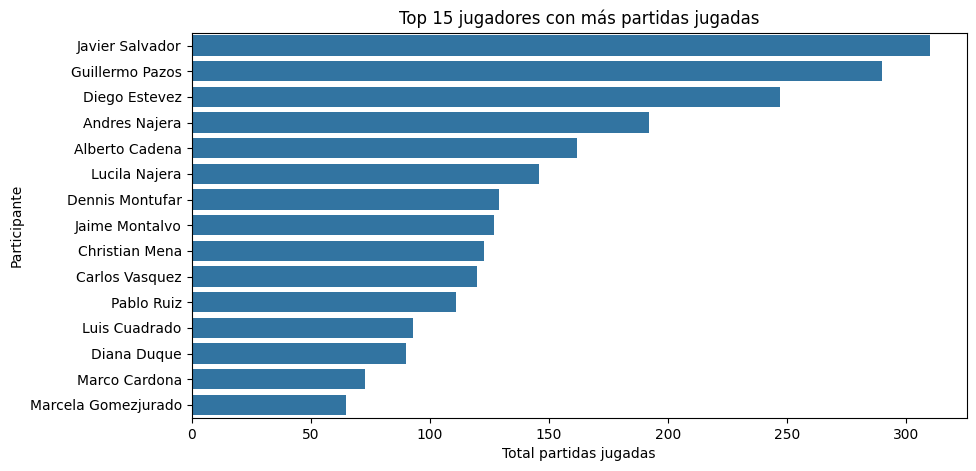

In [ ]:
# 15 JUGADORES QUE MAS HAN JUGADO
plt.figure(figsize=(10,5))
top = resumen.sort_values("total_partidas", ascending=False).head(15)
sns.barplot(y=top.index, x=top["total_partidas"])
plt.title("Top 15 jugadores con más partidas jugadas")
plt.xlabel("Total partidas jugadas")
plt.ylabel("Participante")
plt.show()

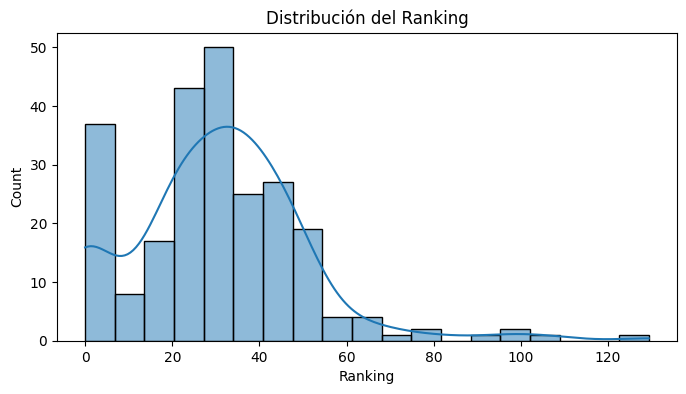

In [ ]:
# DISTRIBUCION DEL RANKING
plt.figure(figsize=(8,4))
sns.histplot(resumen['puntaje_ranking'], kde=True)
plt.title("Distribución del Ranking")
plt.xlabel("Ranking")
plt.show()

In [ ]:
# seleccionamos solo las variables numpericas calculadas
df_num = resumen.select_dtypes(include=['int64', 'float64'])
df_num

,GANO,PERDIO,total_partidas,rendimiento_promedio,puntaje_por_ganancia,torneos_ganados,eventos_ganados,puntaje_ranking
participante,,,,,,,,
Alan Sanchez,0,4,4,0.00,0.0,0,0,0.00
Alberto Cadena,61,101,162,37.65,42.7,4,1,48.42
Alejandro Granda,1,2,3,33.33,0.7,0,0,21.91
Alejandro Matute,1,2,3,33.33,0.7,0,0,21.91
Alejandro Pozo,1,2,3,33.33,0.7,0,0,21.91
...,...,...,...,...,...,...,...,...
Victor Salaz,1,2,3,33.33,0.7,0,0,21.91
William Almachi,1,2,3,33.33,0.7,0,0,21.91
Xavier Calderon,0,4,4,0.00,0.0,0,0,0.00


In [ ]:
from scipy import stats

# Media
media = df_num.mean()

# Mediana
mediana = df_num.median()

# Moda (puede devolver varias)
moda = df_num.mode().iloc[0]

media, mediana, moda

(GANO                     9.024793
 PERDIO                   9.272727
 total_partidas          18.301653
 rendimiento_promedio    41.038388
 puntaje_por_ganancia     6.317355
 torneos_ganados          0.830579
 eventos_ganados          0.128099
 puntaje_ranking         30.357231
 dtype: float64,
 GANO                     3.000
 PERDIO                   3.000
 total_partidas           7.000
 rendimiento_promedio    44.440
 puntaje_por_ganancia     2.100
 torneos_ganados          0.000
 eventos_ganados          0.000
 puntaje_ranking         32.645
 dtype: float64,
 GANO                    1.0
 PERDIO                  2.0
 total_partidas          3.0
 rendimiento_promedio    0.0
 puntaje_por_ganancia    0.7
 torneos_ganados         0.0
 eventos_ganados         0.0
 puntaje_ranking         0.0
 Name: 0, dtype: float64)

In [ ]:
#Minimos y máximos
minimos = df_num.min()
maximos = df_num.max()

minimos, maximos

(GANO                    0.0
 PERDIO                  0.0
 total_partidas          1.0
 rendimiento_promedio    0.0
 puntaje_por_ganancia    0.0
 torneos_ganados         0.0
 eventos_ganados         0.0
 puntaje_ranking         0.0
 dtype: float64,
 GANO                    184.00
 PERDIO                  158.00
 total_partidas          310.00
 rendimiento_promedio    100.00
 puntaje_por_ganancia    128.80
 torneos_ganados          28.00
 eventos_ganados           4.00
 puntaje_ranking         129.32
 dtype: float64)

In [ ]:
desviacion = df_num.std()
desviacion

,0
GANO,21.538333
PERDIO,19.887860
total_partidas,40.103961
rendimiento_promedio,23.099282
puntaje_por_ganancia,15.076833
torneos_ganados,3.134637
eventos_ganados,0.527379
puntaje_ranking,20.353099


In [ ]:
# Percentiles
percentiles = df_num.quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
percentiles

,GANO,PERDIO,total_partidas,rendimiento_promedio,puntaje_por_ganancia,torneos_ganados,eventos_ganados,puntaje_ranking
0.25,1.00,2.00,3.00,28.7800,0.700,0.00,0.0,19.7475
0.50,3.00,3.00,7.00,44.4400,2.100,0.00,0.0,32.6450
0.75,7.00,7.00,14.00,58.0325,4.900,0.00,0.0,41.3775
0.90,18.00,14.00,34.80,66.6700,12.600,1.00,0.0,49.1870
0.95,37.75,35.80,89.15,71.4300,26.425,3.00,1.0,58.1925
0.99,124.24,103.95,224.45,85.2451,86.968,17.59,3.0,99.9449


In [ ]:
df_num.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,GANO,PERDIO,total_partidas,rendimiento_promedio,puntaje_por_ganancia,torneos_ganados,eventos_ganados,puntaje_ranking
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,9.024793,9.272727,18.301653,41.038388,6.317355,0.830579,0.128099,30.357231
std,21.538333,19.887860,40.103961,23.099282,15.076833,3.134637,0.527379,20.353099
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,3.000000,28.780000,0.700000,0.000000,0.000000,19.747500
50%,3.000000,3.000000,7.000000,44.440000,2.100000,0.000000,0.000000,32.645000
75%,7.000000,7.000000,14.000000,58.032500,4.900000,0.000000,0.000000,41.377500
90%,18.000000,14.000000,34.800000,66.670000,12.600000,1.000000,0.000000,49.187000
95%,37.750000,35.800000,89.150000,71.430000,26.425000,3.000000,1.000000,58.192500
99%,124.240000,103.950000,224.450000,85.245100,86.968000,17.590000,3.000000,99.944900


In [ ]:
resumen_estadistico = {
    "Media": media,
    "Mediana": mediana,
    "Moda": moda,
    "Desv. Estándar": desviacion,
    "Mínimo": minimos,
    "Máximo": maximos
}

import pandas as pd
tabla_estadistica = pd.DataFrame(resumen_estadistico)
tabla_estadistica

,Media,Mediana,Moda,Desv. Estándar,Mínimo,Máximo
GANO,9.024793,3.000,1.0,21.538333,0.0,184.00
PERDIO,9.272727,3.000,2.0,19.887860,0.0,158.00
total_partidas,18.301653,7.000,3.0,40.103961,1.0,310.00
rendimiento_promedio,41.038388,44.440,0.0,23.099282,0.0,100.00
puntaje_por_ganancia,6.317355,2.100,0.7,15.076833,0.0,128.80
torneos_ganados,0.830579,0.000,0.0,3.134637,0.0,28.00
eventos_ganados,0.128099,0.000,0.0,0.527379,0.0,4.00
puntaje_ranking,30.357231,32.645,0.0,20.353099,0.0,129.32


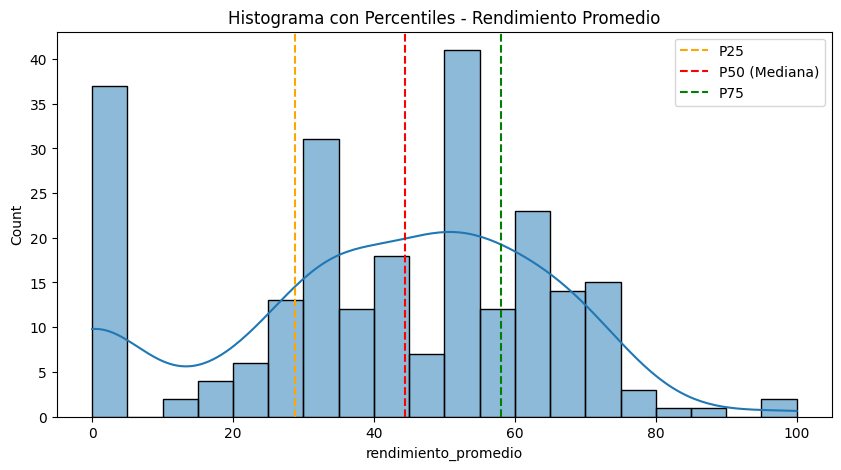

In [ ]:
import numpy as np

variable = resumen['rendimiento_promedio'].dropna()

plt.figure(figsize=(10,5))
sns.histplot(variable, kde=True, bins=20)

# Calcular percentiles
p25 = np.percentile(variable, 25)
p50 = np.percentile(variable, 50)
p75 = np.percentile(variable, 75)

# Dibujar líneas verticales
plt.axvline(p25, color='orange', linestyle='--', label='P25')
plt.axvline(p50, color='red', linestyle='--', label='P50 (Mediana)')
plt.axvline(p75, color='green', linestyle='--', label='P75')

plt.title("Histograma con Percentiles - Rendimiento Promedio")
plt.legend()
plt.show()


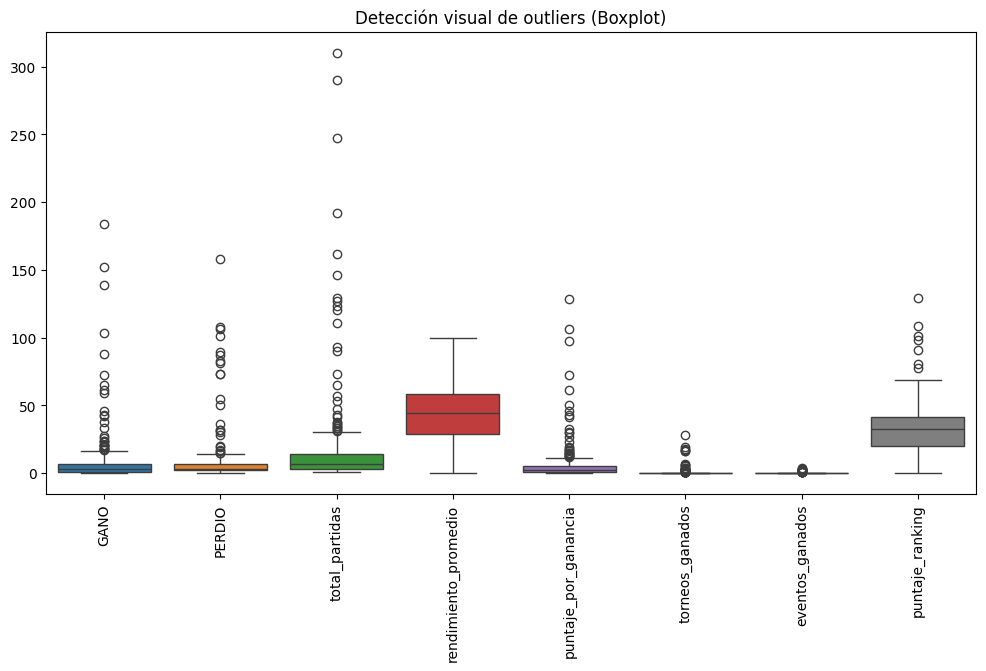

In [ ]:
# Detección de outliers mediante Bloxplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_num)
plt.title("Detección visual de outliers (Boxplot)")
plt.xticks(rotation=90)
plt.show()

